In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pyfolio as pf
from extract_returns import extract_returns

In [2]:
results = pd.read_pickle('results_strategy_2a_2008-2018.pickle')
results.tail()

,algo_volatility,algorithm_period_return,alpha,atr,benchmark_period_return,benchmark_volatility,beta,capital_used,correlations,ending_cash,...,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,target,trading_days,transactions,treasury_period_return
2018-10-25 20:00:00+00:00,0.248925,5.384478,0.231687,AD 0.006392 BO 0.459450 BP 0.01...,1.306531,0.199877,-0.300412,-89636.39,PA 0.5 BO 0.5 RU 0.5 MP 0.5 CD ...,6.384478e+07,...,0.0,12,1.196112,6.393442e+07,-5.023574e+09,0.0,Future(27668 [FFX18]) -50.000000 Future(2774...,2725,"[{'sid': Future(27425 [EHX18]), 'dt': 2018-10-...",0.0
2018-10-26 20:00:00+00:00,0.249125,5.157413,0.227659,AD 0.006402 BO 0.458800 BP 0.01...,1.265965,0.199915,-0.298675,-2270657.00,PA 0.5 SI 0.5 BO 0.5 RU 0.5 MP ...,6.157413e+07,...,0.0,14,1.174072,6.384478e+07,-5.048342e+09,0.0,Future(27586 [NGZ18]) 0.190303 Future(2766...,2726,"[{'sid': Future(27586 [NGZ18]), 'dt': 2018-10-...",0.0
2018-10-29 20:00:00+00:00,0.249083,5.191005,0.227931,AD 0.006392 BO 0.458300 BP 0.01...,1.253411,0.199886,-0.298715,335926.00,PA 0.5 SI 0.5 BO 0.5 RU 0.5 MP ...,6.191005e+07,...,0.0,12,1.176830,6.157413e+07,-5.072912e+09,0.0,Future(27586 [NGZ18]) 0.189318 Future(2766...,2727,"[{'sid': Future(27849 [FVZ18]), 'dt': 2018-10-...",0.0
2018-10-30 20:00:00+00:00,0.249052,5.251151,0.229111,AD 0.006387 BO 0.456400 BP 0.01...,1.286803,0.199898,-0.298273,601461.00,MP 0.5 PL 0.5 CL 0.5 AD 0.5 CD ...,6.251151e+07,...,0.0,12,1.181908,6.191005e+07,-4.865600e+09,0.0,Future(27586 [NGZ18]) 0.189102 Future(2766...,2728,[],0.0
2018-10-31 20:00:00+00:00,0.249071,5.372309,0.231061,AD 0.006362 BO 0.455900 BP 0.01...,1.311228,0.199886,-0.297757,1211578.00,PA 0.5 PL 0.5 CL 0.5 AD 0.5 CD ...,6.372309e+07,...,0.0,13,1.192251,6.251151e+07,-4.864998e+09,0.0,Future(27586 [NGZ18]) 0.194390 Future(2766...,2729,"[{'sid': Future(27823 [PAZ18]), 'dt': 2018-10-...",0.0


In [3]:
returns, positions, transactions = extract_returns(results)

In [4]:
def save_to_files(resulsts, positions, transactions):
    results.to_csv('results.csv')
    returns.to_csv('returns.csv')
    transactions.to_csv('transactions.csv')
    positions.to_csv('positions.csv')
#save_to_files(results, positions, transactions)

In [5]:
# generate sector dictionary for every symbol
pos = list(positions.columns)
pos.remove('cash')
sectors = pd.read_csv('../bundles/meta.csv', usecols=['root_symbol', 'sector', 'sub_sector'], index_col=['root_symbol'])
sectors['sector'] = sectors['sector'].str.cat(sectors['sub_sector'], sep='/')
del sectors['sub_sector']
sectors.index = sectors.index.map(lambda x: x if len(x) > 1 else '_' + x)
sectors = sectors.T.to_dict(orient='records')[0]
sector_map = {p: sectors[p.root_symbol] for p in pos}

In [6]:
out_of_sample=results.index[-21]
transactions_mod = transactions.copy()
transactions_mod.price = transactions.sid.apply(lambda x: x.multiplier) * transactions.price
benchmark = (results['benchmark_period_return'] + 1).pct_change()[1:]
benchmark.index = benchmark.index.normalize()

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,40.12,2015-01-30,2017-08-10,NaT,NaN
1,31.62,2011-08-09,2013-10-10,2014-03-18,681
2,27.46,2008-03-17,2008-09-22,2008-10-09,149
3,20.38,2009-12-01,2010-05-27,2010-09-24,214
4,15.25,2010-11-04,2011-01-07,2011-02-01,64


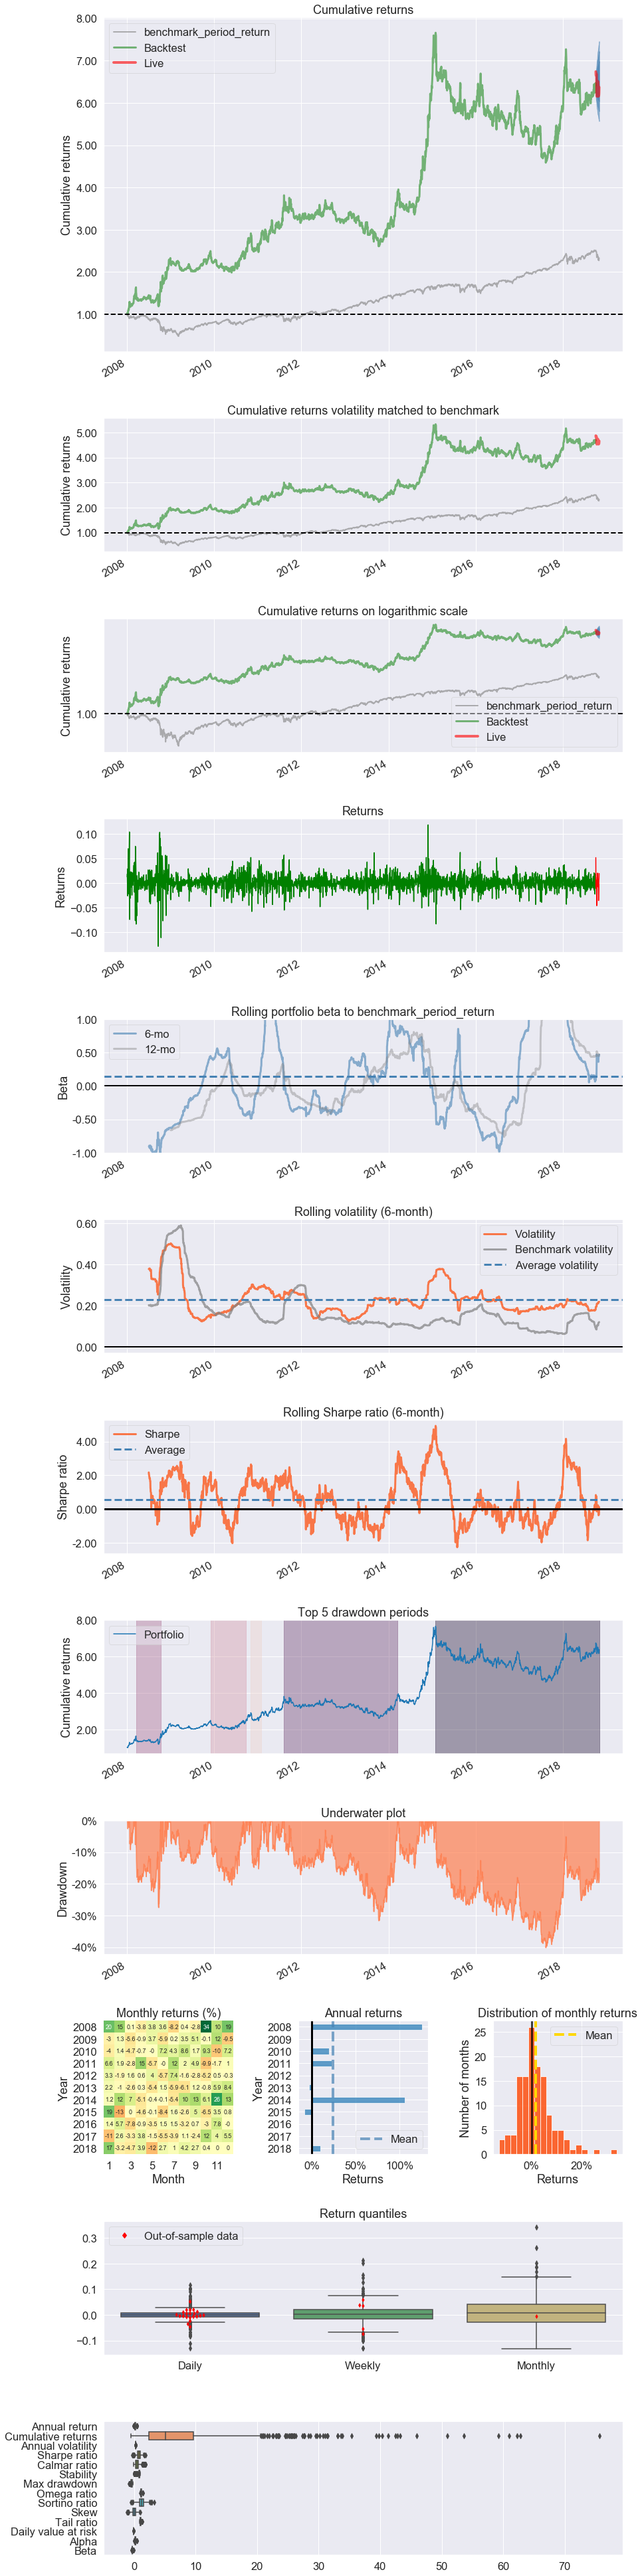

Stress Events,mean,min,max
Lehmann,0.01%,-12.83%,9.89%
US downgrade/European Debt Crisis,0.07%,-5.50%,5.69%
Fukushima,0.38%,-2.17%,2.42%
EZB IR Event,-0.30%,-2.51%,1.51%
Mar08,-0.10%,-8.34%,7.45%
Sept08,-0.01%,-12.83%,9.89%
2009Q1,-0.04%,-3.40%,2.21%
2009Q2,-0.05%,-2.73%,2.90%
Flash Crash,-0.40%,-1.66%,2.04%
Apr14,-0.30%,-4.40%,2.12%


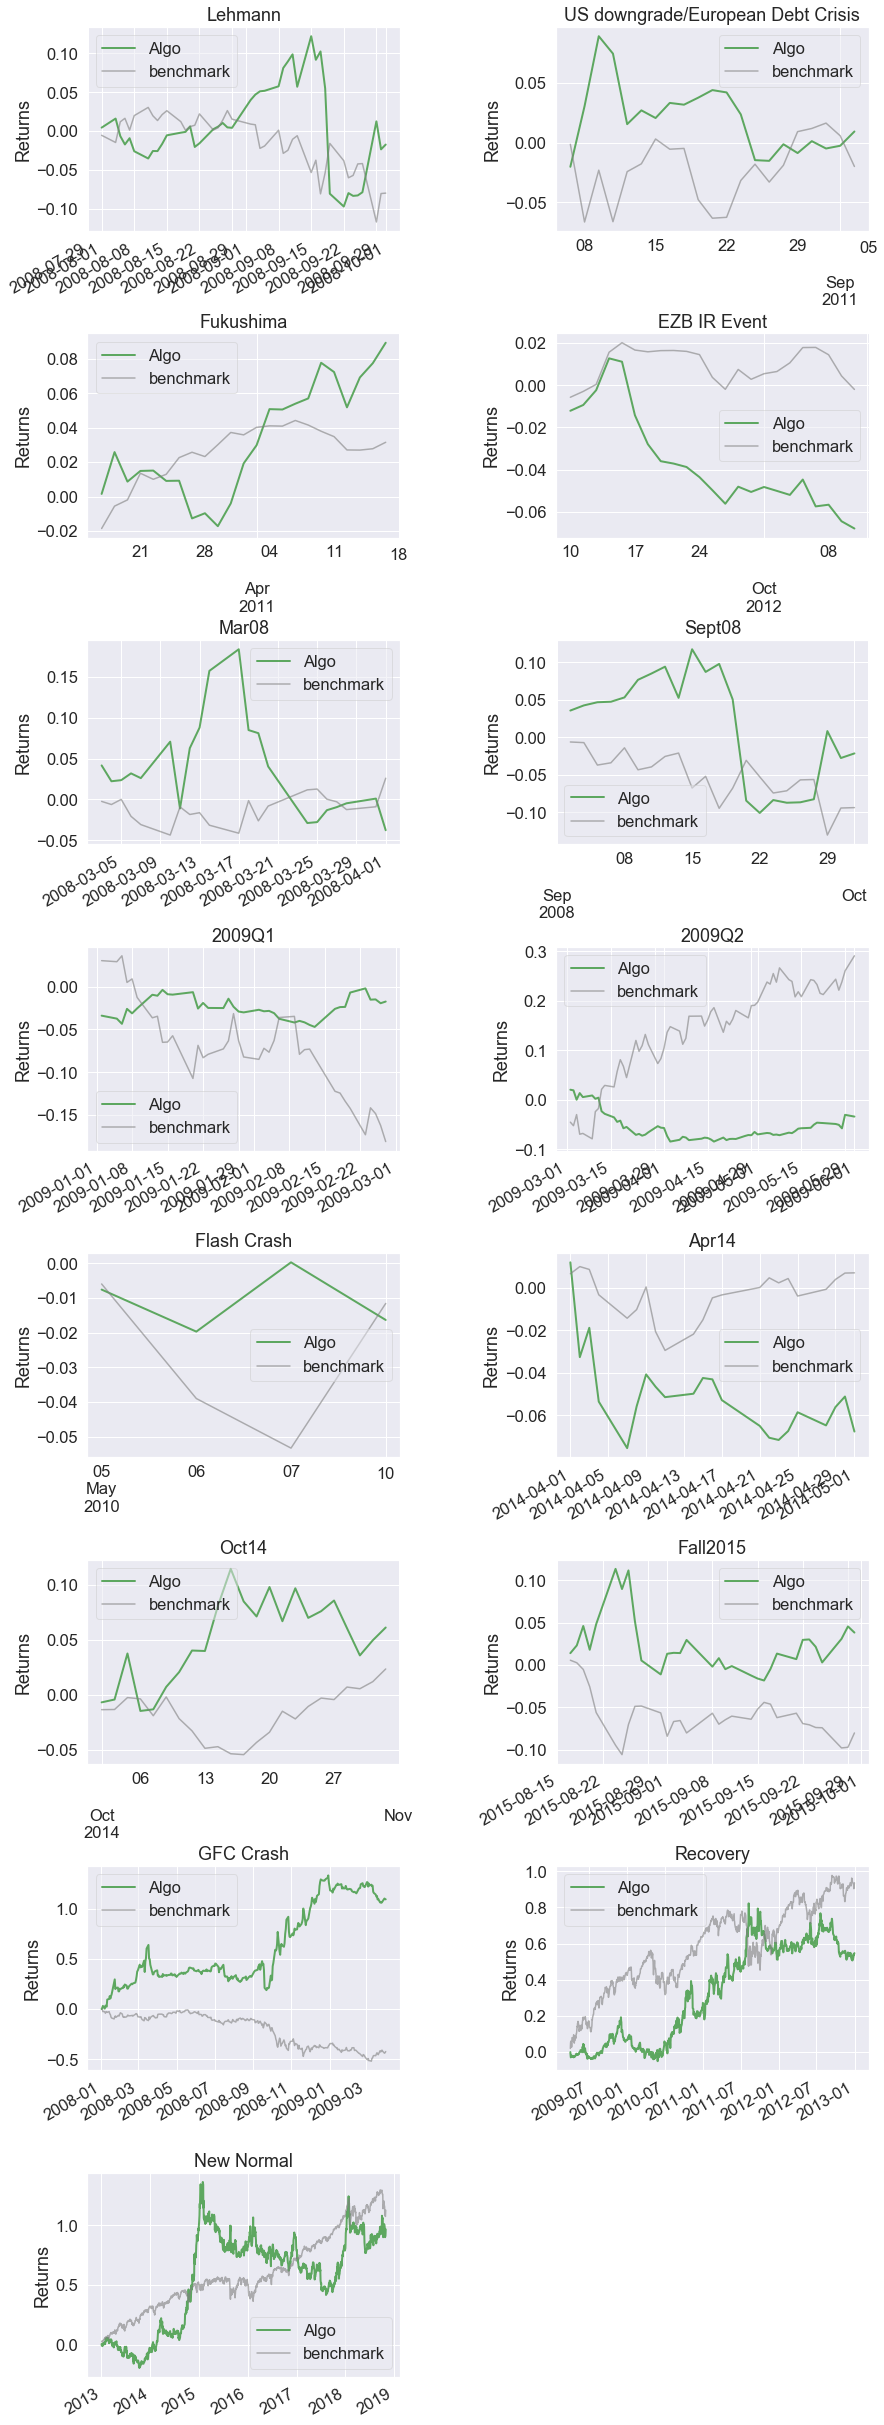

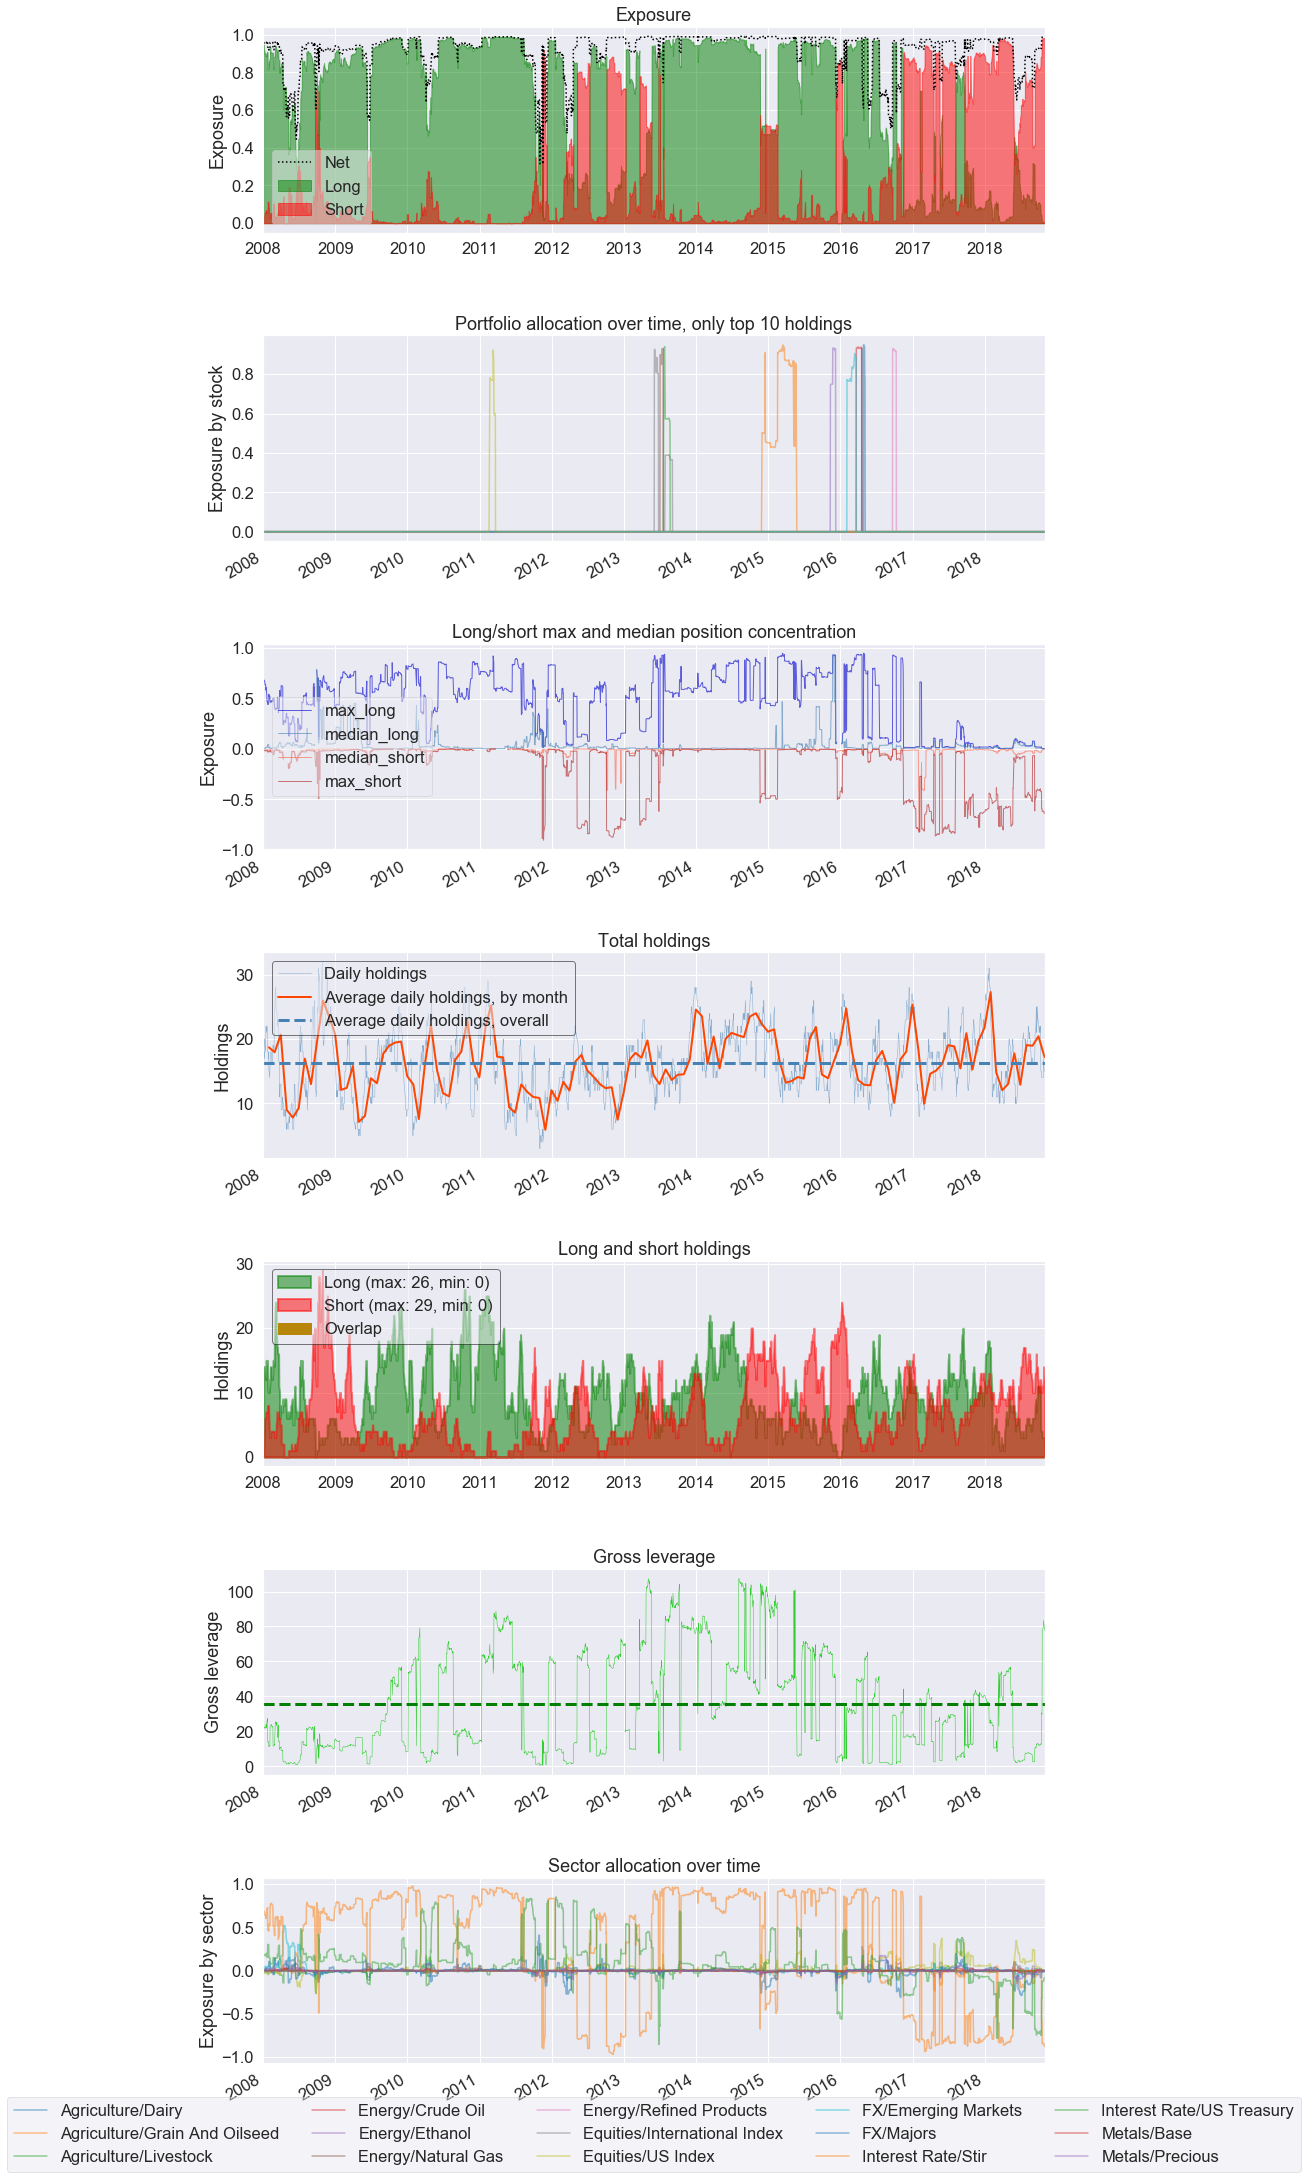

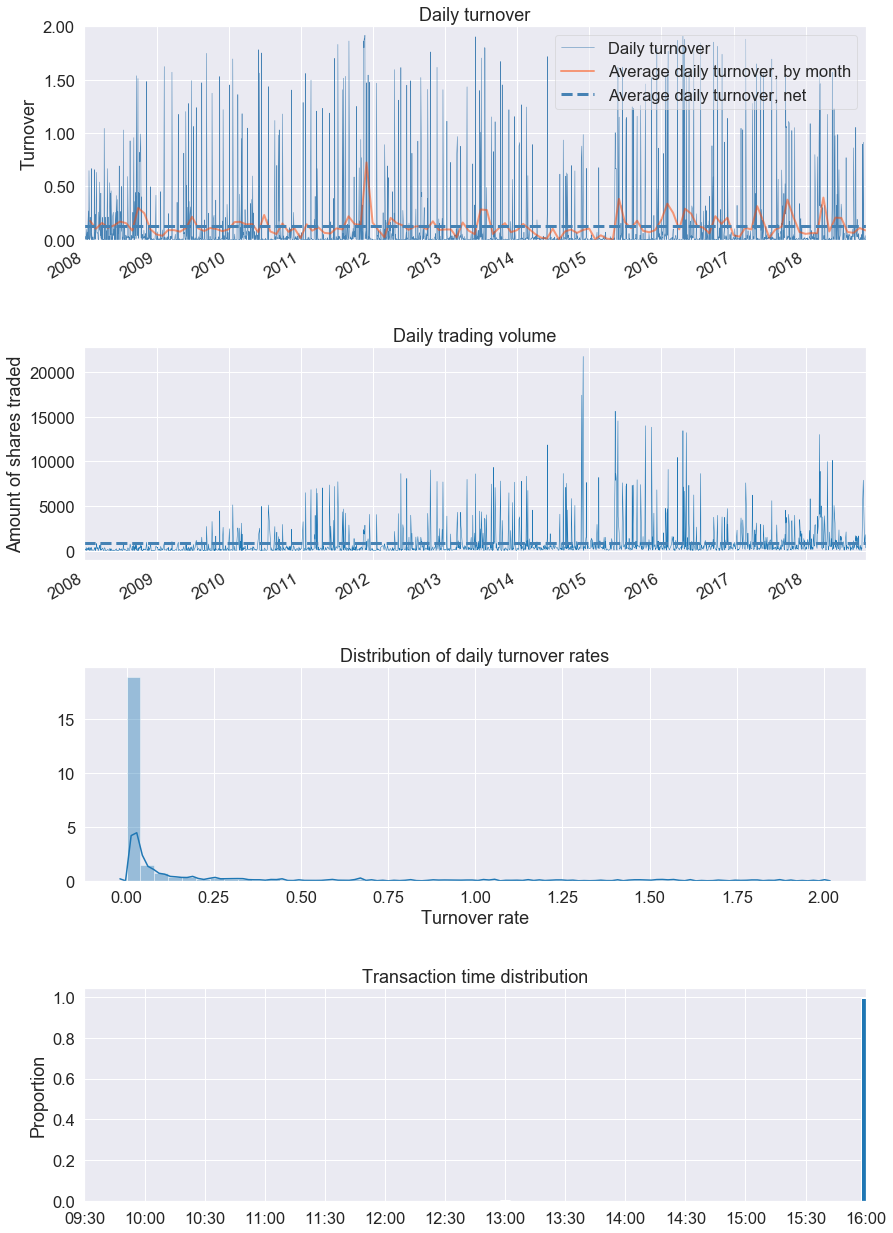

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,2231.00,965.00,1266.00
Percent profitable,0.47,0.48,0.47
Winning round_trips,1052.00,463.00,589.00
Losing round_trips,1152.00,499.00,653.00
Even round_trips,27.00,3.00,24.00


PnL stats,All trades,Short trades,Long trades
Total profit,$53723091.20,$27103897.12,$26619194.08
Gross profit,$325883770.95,$147666775.79,$178216995.16
Gross loss,$-272160679.75,$-120562878.68,$-151597801.07
Profit factor,$1.20,$1.22,$1.18
Avg. trade net profit,$24080.27,$28086.94,$21026.22
Avg. winning trade,$309775.45,$318934.72,$302575.54
Avg. losing trade,$-236250.59,$-241608.98,$-232155.90
Ratio Avg. Win:Avg. Loss,$1.31,$1.32,$1.30
Largest winning trade,$4393750.00,$4393750.00,$3951750.00
Largest losing trade,$-4165625.00,$-4165625.00,$-1500474.19


Duration stats,All trades,Short trades,Long trades
Avg duration,28 days 17:19:28.271178,28 days 08:08:57.214507,29 days 00:19:05.972353
Median duration,23 days 00:00:00,24 days 00:00:00,22 days 00:00:00
Longest duration,175 days 23:00:00,117 days 01:00:00,175 days 23:00:00
Shortest duration,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,-0.01%,-0.05%,0.02%
Avg returns winning,0.13%,0.14%,0.13%
Avg returns losing,-0.15%,-0.22%,-0.10%
Median returns all round_trips,0.00%,-0.00%,0.00%
Median returns winning,0.03%,0.03%,0.02%
Median returns losing,-0.02%,-0.02%,-0.02%
Largest winning trade,8.46%,3.44%,8.46%
Largest losing trade,-48.93%,-48.93%,-2.89%


Profitability (PnL / PnL total) per name,
symbol,
ECH15,8.18%
YMZ17,7.36%
EHJ14,6.30%
RUZ14,5.78%
LNJ14,5.70%
YMH18,5.37%
CLF15,4.94%
BZZ14,4.76%
ESH18,4.60%


Profitability (PnL / PnL total) per name,
symbol,
Equities/US Index,27.04%
Interest Rate/Stir,22.29%
Energy/Crude Oil,21.93%
Energy/Refined Products,11.57%
Agriculture/Dairy,10.57%
FX/Emerging Markets,5.98%
Metals/Base,5.28%
Metals/Precious,5.28%
Energy/Natural Gas,5.16%


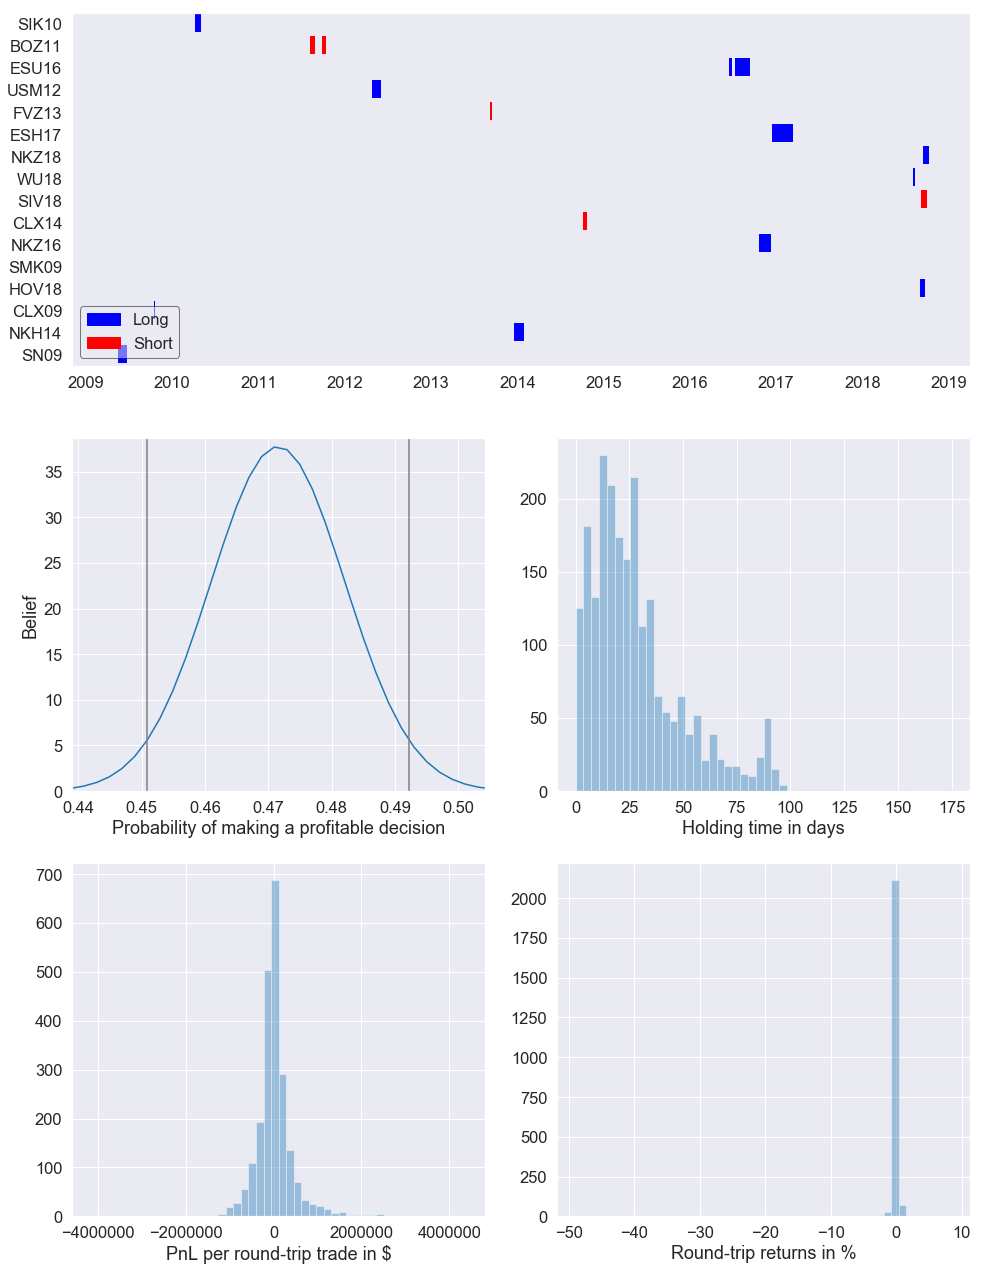

In [7]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions_mod,
                          live_start_date=out_of_sample, round_trips=True, benchmark_rets=benchmark,
                          sector_mappings=sector_map, hide_positions=True)

# PnL by root symbol in dollars and % of total PnL

In [8]:
from pyfolio.round_trips import extract_round_trips, add_closing_transactions, apply_sector_mappings_to_round_trips
trips = add_closing_transactions(positions, transactions_mod)
trips['value'] = -trips.amount * trips.price
trips['root_symbol'] = trips['symbol'].apply(lambda x: x.root_symbol)
trips = trips.groupby(by='root_symbol').sum().sort_values(by='value', ascending=False)
trips['percent'] = round(trips.value.divide(abs(trips.value.sum())) * 100, 1)
del trips['amount']
del trips['price']
trips

,value,percent
root_symbol,,
YM,6.762720e+06,12.6
BZ,6.535270e+06,12.2
FF,6.132953e+06,11.4
ED,5.842708e+06,10.9
DA,5.678600e+06,10.6
CL,5.257790e+06,9.8
ES,4.963525e+06,9.2
HO,4.321632e+06,8.0
EC,4.040375e+06,7.5


In [9]:
#sanity check
trips.value.sum()

53723091.197002225

# Visualization of trades for given root symbol

In [10]:
root = 'ES'

In [11]:
from utils import future, continuous_future, history
import matplotlib.pyplot as plt
%matplotlib inline

def his(root, field='price'):
    return history(
                   assets=[continuous_future(root,
                                     offset=0,
                                     adjustment=None,
                                     roll_style='volume')],
                    end_dt=results.index[-1],
                    bar_count=len(results),
                    frequency='1d',
                    field=field,
                    data_frequency='daily'
                    )

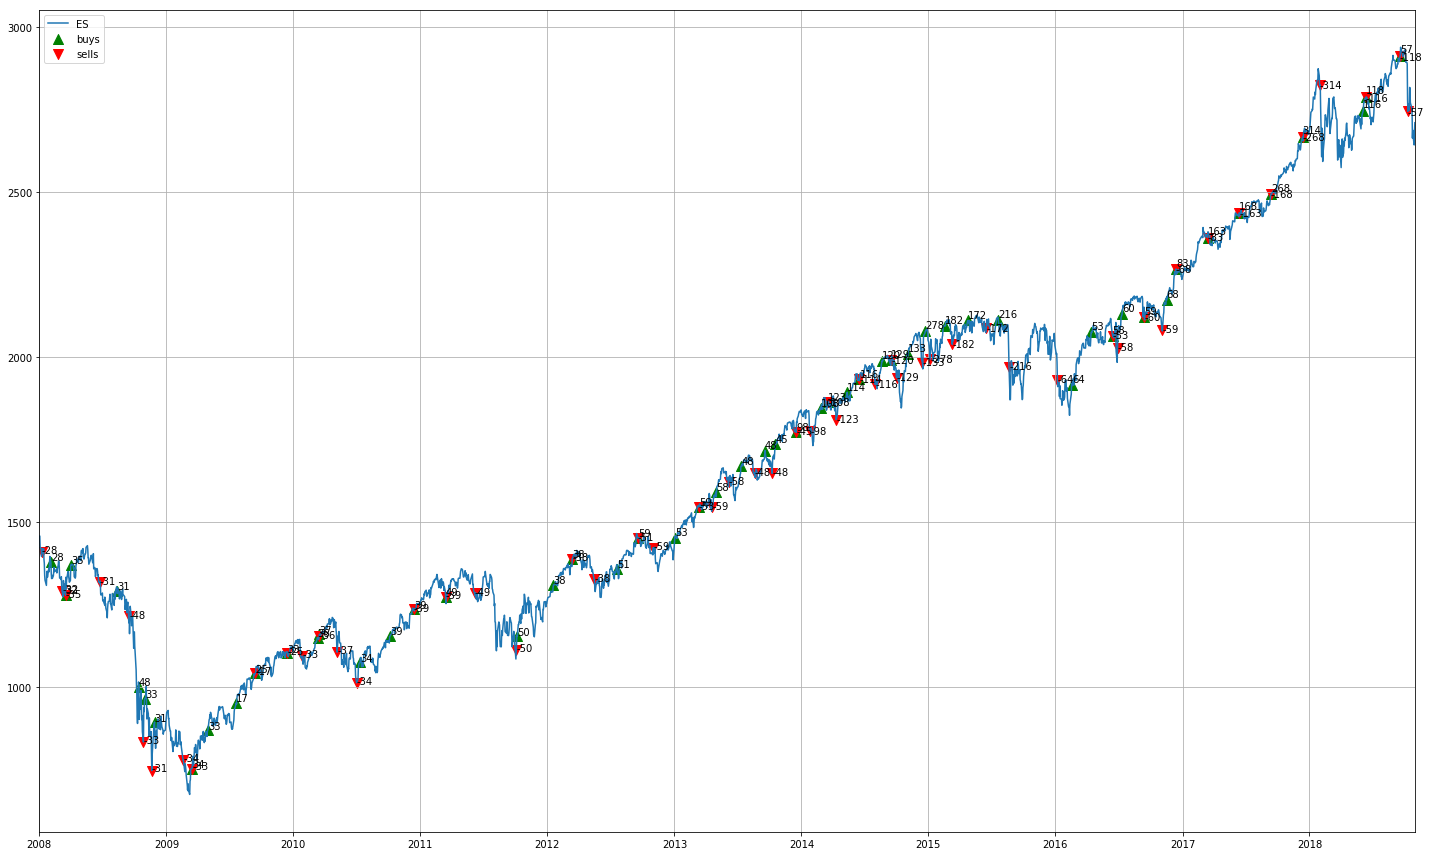

In [12]:
h = his(root)
h.columns=[root]

transactions['root_symbol'] = transactions['symbol'].apply(lambda x: x.root_symbol)
selected = transactions[transactions['root_symbol'] == root]
selected.index = selected.index.normalize()
buys = selected[selected['amount'] > 0]
sells = selected[selected['amount'] < 0]

plt.figure(figsize=(20,12))
plt.plot(h, label=root)
plt.scatter(buys.index, h.loc[buys.index], label='buys', color='green', s=100, marker="^")
plt.scatter(sells.index, h.loc[sells.index], label='sells', color='red', s=100, marker="v")
for i, txt in enumerate(buys['amount'].values):
    plt.annotate(txt, (buys.index[i], h.loc[buys.index[i]][root]*1.004))
for i, txt in enumerate(sells['amount'].values):
    plt.annotate(txt, (sells.index[i], h.loc[sells.index[i]][root]*.996))
plt.xlim(h.index.min(), h.index.max())
plt.legend(loc='best')
plt.grid()
#plt.rcParams['font.size'] = 15
plt.tight_layout()
plt.show();

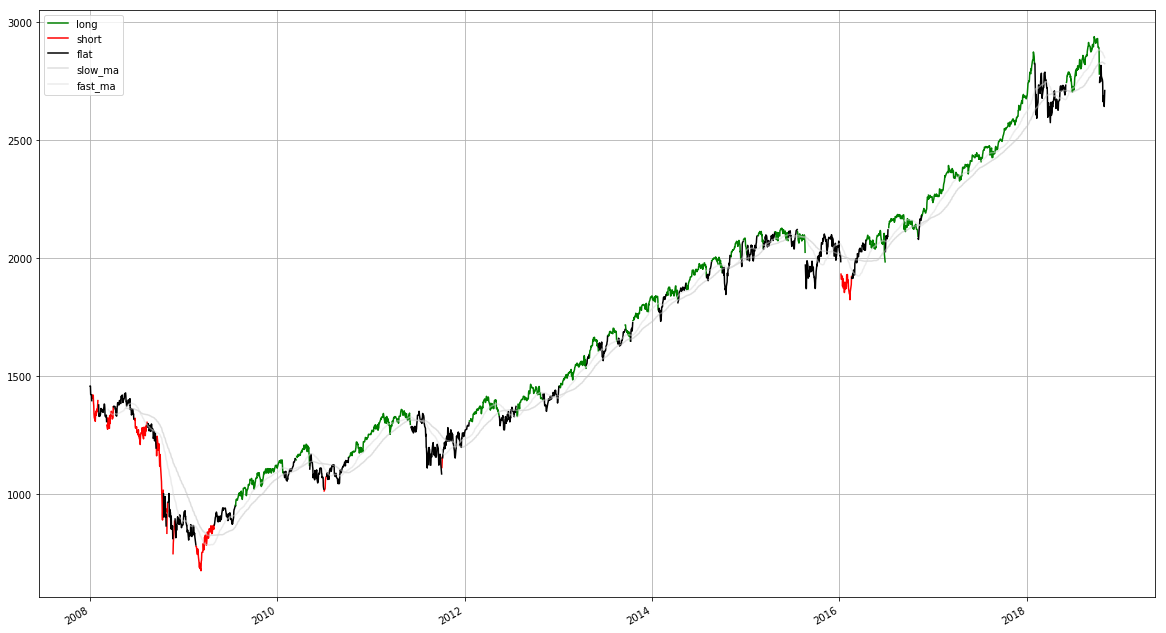

In [13]:
chart = h.copy()
chart = chart.join(selected.amount)
chart.amount = chart.amount.fillna(0)
chart.ix[0, 'amount']=0
chart['cumulative'] = chart['amount'].cumsum(skipna=False)

chart['long'] = chart['cumulative'] > 0
chart['short'] = chart['cumulative'] < 0
chart['flat'] = chart['cumulative'] == 0
chart['long'] = chart['long'] * chart[root]
chart['short'] = chart['short'] * chart[root]
chart['flat'] = chart['flat'] * chart[root]
chart['slow_ma'] = chart[root].rolling(100).mean()
chart['fast_ma'] = chart[root].rolling(50).mean()
chart = chart[['long', 'short', 'flat', 'slow_ma', 'fast_ma']].applymap(lambda x: x if x != 0 else np.nan)

chart['long'].plot(figsize=(20,12), legend=True, color='green')
chart['short'].plot(legend=True, color='red')
chart['flat'].plot(legend=True, color='black')
chart['slow_ma'].plot(legend=True, color='.75', alpha=0.5)
chart['fast_ma'].plot(legend=True, color='.85', alpha=0.5)
plt.grid();

In [14]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

full_h = his(root)
full_h.columns = ['close']
for field in ['open', 'high', 'low',]:
    full_h[field] = his(root, field)

In [15]:
exclude_rolls = False
if exclude_rolls:
    intersection = buys.index.intersection(sells.index)
    buys = buys.drop(intersection)
    sells = sells.drop(intersection)

In [16]:
trace1 = go.Candlestick(x=full_h.index, 
                        open=full_h.open,
                        high=full_h.high,
                        low=full_h.low,
                        close=full_h.close, 
                        name=root, 
                        hoverinfo='none',
                       )


params = {
    'mode': 'markers',
    'hoverinfo': 'text',
}
trace2 = go.Scatter(
    x=buys.index,
    y=buys['price'],
    name='Buys',
    text=list(buys['amount']),
    textposition='middle left',
    marker=dict(size=8,
                color='rgba(0, 0, 128, .9)'),
    **params,
)
trace3 = go.Scatter(
    x=sells.index,
    y=sells['price'],
    name='Sells',
    text=list(sells['amount']),
    textposition='middle right',
    marker=dict(size=8,
                color='rgba(255, 255, 0, .9)'),
    **params
)

layout = go.Layout(
    xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)
data = [trace1, trace2, trace3]
fig = go.Figure(data=data,layout=layout)

py.iplot(fig, filename='candlestick_chart')

In [17]:
transactions[transactions['root_symbol']==root]

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars,root_symbol
2008-01-09 21:00:00+00:00,-28,None,2008-01-09 21:00:00+00:00,74d3a5c7ef0b4549afbb7909710ac4eb,1397.25,Future(7660 [ESH08]),Future(7660 [ESH08]),1956150.0,ES
2008-02-04 21:00:00+00:00,28,None,2008-02-04 21:00:00+00:00,c494fddd9081448da79d0ce4f43a41c4,1396.75,Future(7660 [ESH08]),Future(7660 [ESH08]),-1955450.0,ES
2008-03-07 21:00:00+00:00,-32,None,2008-03-07 21:00:00+00:00,e428e30b3c034e5fa8089e265ecc3d2a,1307.00,Future(7660 [ESH08]),Future(7660 [ESH08]),2091200.0,ES
2008-03-17 20:00:00+00:00,-35,None,2008-03-17 20:00:00+00:00,c924e98b03de48bdb988ff12f4776316,1289.50,Future(7744 [ESM08]),Future(7744 [ESM08]),2256625.0,ES
2008-03-17 20:00:00+00:00,32,None,2008-03-17 20:00:00+00:00,b729d70a5a6d4146a9daf18052a0e5d2,1291.00,Future(7660 [ESH08]),Future(7660 [ESH08]),-2065600.0,ES
2008-04-02 20:00:00+00:00,35,None,2008-04-02 20:00:00+00:00,e6c52e85d6134416955a84122f609389,1370.25,Future(7744 [ESM08]),Future(7744 [ESM08]),-2397937.5,ES
2008-06-23 20:00:00+00:00,-31,None,2008-06-23 20:00:00+00:00,d8b83aef145142078fdf8e4dd9b707f6,1320.75,Future(7830 [ESU08]),Future(7830 [ESU08]),2047162.5,ES
2008-08-12 20:00:00+00:00,31,None,2008-08-12 20:00:00+00:00,ed213e4e6d3e4e8d9007b6e199010eb6,1303.75,Future(7830 [ESU08]),Future(7830 [ESU08]),-2020812.5,ES
2008-09-16 20:00:00+00:00,-48,None,2008-09-16 20:00:00+00:00,3b3673dba6d04f6d86190401300ce1e6,1195.50,Future(7915 [ESZ08]),Future(7915 [ESZ08]),2869200.0,ES
2008-10-14 20:00:00+00:00,48,None,2008-10-14 20:00:00+00:00,34d014263b564a13842090171795c7f7,1012.00,Future(7915 [ESZ08]),Future(7915 [ESZ08]),-2428800.0,ES


In [18]:
t= transactions[transactions['root_symbol']==root]

In [19]:
t.loc['2015':'2018']

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars,root_symbol
2015-01-06 21:00:00+00:00,-278,None,2015-01-06 21:00:00+00:00,ddd12896332f4121953d5431b22910ee,2019.00,Future(13471 [ESH15]),Future(13471 [ESH15]),28064100.0,ES
2015-02-17 21:00:00+00:00,182,None,2015-02-17 21:00:00+00:00,e6bac4b514d34816b4bf29f9bdcb3776,2091.25,Future(13471 [ESH15]),Future(13471 [ESH15]),-19030375.0,ES
2015-03-11 20:00:00+00:00,-182,None,2015-03-11 20:00:00+00:00,eef67189e0a94379973492c582daac9f,2044.25,Future(13471 [ESH15]),Future(13471 [ESH15]),18602675.0,ES
2015-04-24 20:00:00+00:00,172,None,2015-04-24 20:00:00+00:00,a0544845036b440999ed66dc319da994,2107.50,Future(14278 [ESM15]),Future(14278 [ESM15]),-18124500.0,ES
2015-06-16 20:00:00+00:00,-172,None,2015-06-16 20:00:00+00:00,959729e974b2498f94f6f60633ee9fad,2083.50,Future(14278 [ESM15]),Future(14278 [ESM15]),17918100.0,ES
2015-07-21 20:00:00+00:00,216,None,2015-07-21 20:00:00+00:00,1fc18bd3a5234133aa244685c5e7e03d,2121.25,Future(15086 [ESU15]),Future(15086 [ESU15]),-22909500.0,ES
2015-08-21 20:00:00+00:00,-216,None,2015-08-21 20:00:00+00:00,a54756a2810e497595d37f14659f7aed,2026.25,Future(15086 [ESU15]),Future(15086 [ESU15]),21883500.0,ES
2016-01-07 21:00:00+00:00,-64,None,2016-01-07 21:00:00+00:00,e2b9a376986f451295733f76e844faef,1987.75,Future(16721 [ESH16]),Future(16721 [ESH16]),6360800.0,ES
2016-02-18 21:00:00+00:00,64,None,2016-02-18 21:00:00+00:00,74019d4dcc7342859a16c8f6a8ddef0e,1922.75,Future(16721 [ESH16]),Future(16721 [ESH16]),-6152800.0,ES
2016-04-14 20:00:00+00:00,53,None,2016-04-14 20:00:00+00:00,9e5f8a3ef8ff4e4a8f0450274518ff05,2076.25,Future(17483 [ESM16]),Future(17483 [ESM16]),-5502062.5,ES
